<a href="https://colab.research.google.com/github/aimatochysia/IGI2023-WoS/blob/main/Tutorial_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook ini menjelaskan langkah-langkah untuk membuat model Decision Tree (Pohon Keputusan)


1. Import library yang diperlukan
2. Download dataset
3. Membaca dataset
4. Cek detail dataset
5. Konversi target label menjadi integer
6. Bangun Model Decision Tree
7. Training Model
8. Visualisasi Klasifikasi oleh Decision Tree
9. Membuat Prediksi
10. Cek Akurasi
11. Cek Hasil Klasifikasi

## Import library yang diperlukan

In [ ]:
import pandas as pd                                    # Untuk manipulasi & pengecekan data
import numpy as np                                     # Untuk operasi matematika dan aljabar linier
from sklearn.model_selection import train_test_split   # Untuk split dataset menjadi train vs test

# Tidak semua library perlu diimport pada tahap ini
# Import yang diperlukan paling awal saja


## Download dataset

In [ ]:
# import files using google colab
from google.colab import files
upload = files.upload()

Saving iris.csv to iris.csv


## Membaca dataset

In [ ]:
data = pd.read_csv('/content/iris.csv',header=None)                # Simpan dataset sebagai dataframe
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

## Cek detail dataset

In [ ]:
X

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# memberi nama pada kolom X
X.columns =['sepal_length', 'sepal_width', 'petal_length', 'petal_width',]

In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: 4, Length: 150, dtype: object

In [ ]:
y.shape

(150,)

In [ ]:
type(y[0])

str

## Konversi target label menjadi integer

In [ ]:
for i in range(len(y)):
  if(y[i]=="Iris-setosa"):        # Assigning different integer for different label
    y[i]=0
  elif(y[i]=="Iris-versicolor"):
    y[i]=1
  else:
    y[i]=2

<ipython-input-37-ad4b770b9694>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=0
<ipython-input-37-ad4b770b9694>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=1
<ipython-input-37-ad4b770b9694>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=2


#### Konversi data X dan Y menjadi array

In [ ]:
y=list(y)
y=np.array(y)
X=np.array(X)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
## Import library lebih banyak
import graphviz                                        # Untuk plot grafik
from sklearn import tree                               # Untuk menggunakan beberapa fungsi dasar tree
from sklearn.tree import DecisionTreeClassifier        # Untuk membuat model Decision tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 33, test_size = 0.20)

In [ ]:
X_train.shape

(120, 4)

## Bangun Model Decision Tree

In [ ]:
model = DecisionTreeClassifier()


## Training Model

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

## Visualisasi Klasifikasi oleh Decision Treee

In [ ]:
datasrc = tree.export_graphviz(model,
                               feature_names=['sepal_length','sepal_width','petal_length','petal_width'],
                               class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],filled=True)
visual = graphviz.Source(datasrc)
visual.render("Gini")

'Gini.pdf'

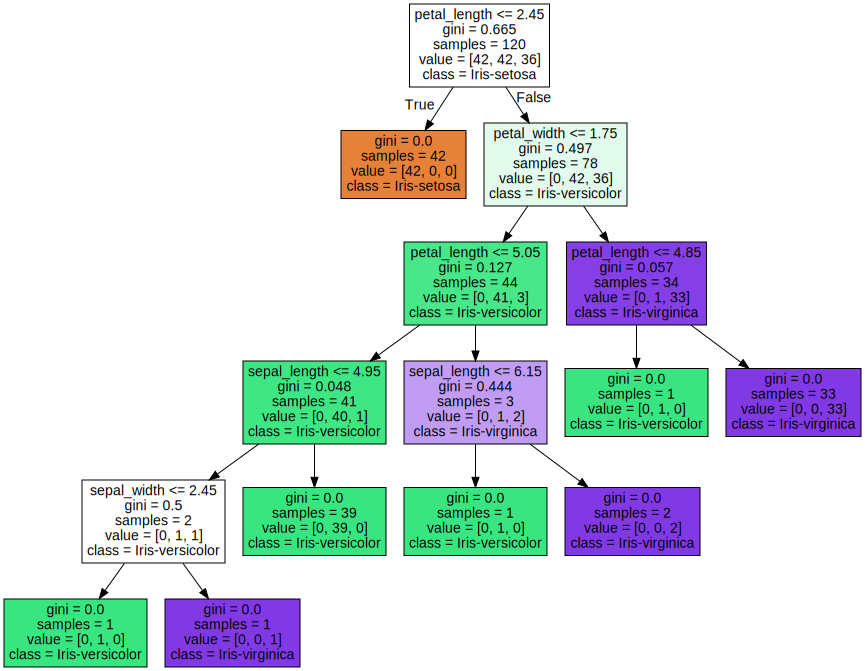

In [ ]:
visual

## Membuat Prediksi

In [ ]:
y_pred = model.predict(X_test)

## Cek akurasi

In [ ]:
accuracy_score(y_pred,y_test)

0.8666666666666667

## Cek Hasil Lengkap Klasifikasi

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.67      0.80        12
           2       0.71      1.00      0.83        10

    accuracy                           0.87        30
   macro avg       0.90      0.89      0.88        30
weighted avg       0.90      0.87      0.86        30

